<a href="https://colab.research.google.com/github/julianamu323/EntropiaAproximada/blob/main/Caos_y_ECG_(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# **Visualización de los datos.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
ECG1 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 1 (arritmia cardiaca).csv',sep=';',low_memory=False)
ECG1.head()

,Elapsed time,MLII
0,0.000,-0.145
1,0.003,-0.145
2,0.006,-0.145
3,0.008,-0.145
4,0.011,-0.145


In [ ]:
ECG3 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 3 (corazón sano).csv',sep=';',low_memory=False)
ECG3.head()

,Elapsed time,ECG
0,0.000,-0.165
1,0.008,-0.155
2,0.016,-0.195
3,0.023,-0.205
4,0.031,-0.185


# **Entropía Aproximada.**

In [ ]:
def ApEn(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

## **Con ECG.**

In [ ]:
# Con ECG 3 (Corazón sano).
m = 2
#r = 0.25*np.std(mv)

ECG3 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 3 (corazón sano).csv',sep=';',low_memory=False)
t = np.array(ECG3.iloc [:, 0])
mv = np.array(ECG3.iloc [:, 1])
r = 0.2*np.std(mv)
print('N = ', len(mv))
print('ApEn3 = ', ApEn(mv, m, r))

N =  1280
ApEn3 =  0.21044607044552222


In [ ]:
# Con ECG 1 (arritmia cardíaca) - 3600 datos.
m = 2
r = 0.1

ECG1 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 1 (arritmia cardiaca).csv',sep=';',low_memory=False)
t = np.array(ECG1.iloc [:, 0])
mv = np.array(ECG1.iloc [:, 1])

print('N = ', len(mv))
print('ApEn1 = ', ApEn(mv, m, r))

N =  3600
ApEn1 =  0.10005832994664898


In [ ]:
ECG1 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 1 (arritmia cardiaca).csv',sep=';',low_memory=False)
df_ECG1 = pd.DataFrame(ECG1)
df_ECG1.drop(df_ECG1.index[1280:3600], inplace=True)
df_nuevo_ECG1 = df_ECG1

In [ ]:
# Con ECG 1 (arritmia cardíaca) - 1280 datos.
m = 2
r = 0.1

t1 = np.array(df_nuevo_ECG1.iloc [:, 0])
mv1 = np.array(df_nuevo_ECG1.iloc [:, 1])

print('N = ', len(mv1))
print('ApEn1 = ', ApEn(mv1, m, r))

N =  1280
ApEn1 =  0.1071563709151806


Señal regular --> Entropía menor

Señal aleatoria --> Entropía mayor

---


Con respecto a los ECG tenemos que el valor de la entropía del ECG1 con un valor $0.1071$ es menor con respecto a la entropía calculada para el ECG3 ($0.2313$). Por lo podríamos concluir que la señal de la arritmia cardíaca (ECG1) presenta más patrones repetitivos que la señal que expone el latido cardíaco normal (ECG3).

## **Variando los parámetros $m$ y $r$.**

**ECG 1.**

In [ ]:
# Variando Parámetros.

t1 = np.array(df_nuevo_ECG1.iloc [:, 0])
mv1 = np.array(df_nuevo_ECG1.iloc [:, 1])

ApEn1 = np.array([ApEn(mv1, 2, 0.1),ApEn(mv1, 3, 0.1),ApEn(mv1, 4, 0.1),ApEn(mv1, 5, 0.1),
                 ApEn(mv1, 6, 0.1),ApEn(mv1, 7, 0.1),ApEn(mv1, 8, 0.1),ApEn(mv1, 9, 0.1),
                 ApEn(mv1, 10, 0.1)])

In [ ]:
ApEn2 = np.array([ApEn(mv1, 2, 0.2*np.std(mv1)),ApEn(mv1, 3,0.2*np.std(mv1)),
                  ApEn(mv1, 4, 0.2*np.std(mv1)),ApEn(mv1, 5, 0.2*np.std(mv1)),
                  ApEn(mv1, 6, 0.2*np.std(mv1)),ApEn(mv1, 7, 0.2*np.std(mv1)),
                  ApEn(mv1, 8, 0.2*np.std(mv1)),ApEn(mv1, 9, 0.2*np.std(mv1)),
                 ApEn(mv1, 10, 0.2*np.std(mv1))])

In [ ]:
ApEn3 = np.array([ApEn(mv1, 2, 0.25),ApEn(mv1, 3, 0.25), ApEn(mv1, 4, 0.25),
                  ApEn(mv1, 5, 0.25),ApEn(mv1, 6, 0.25),ApEn(mv1, 7, 0.25),
                  ApEn(mv1, 8, 0.25),ApEn(mv1, 9, 0.25),ApEn(mv1, 10, 0.25)])

In [ ]:
row_names = [' r = 0.1 ',' r = 0.25 ',' r = 0.2*std ']
col_names = [' m = 2',' m = 3 ',' m = 4 ',' m = 5 ',' m = 6 ',' m = 7 ',' m = 8 ',' m = 9 ',' m = 10 ']

print('ApEn - ECG 1')
matriz = np.array([ApEn1,ApEn3,ApEn2])
df = pd.DataFrame(matriz, columns=col_names, index=row_names)
df

**ECG 3.**

In [ ]:
# Variando Parámetros.

t = np.array(ECG3.iloc [:, 0])
mv = np.array(ECG3.iloc [:, 1])

ApEn1_3 = np.array([ApEn(mv, 2, 0.1),ApEn(mv, 3, 0.1),ApEn(mv, 4, 0.1),ApEn(mv, 5, 0.1),
                 ApEn(mv, 6, 0.1),ApEn(mv, 7, 0.1),ApEn(mv, 8, 0.1),ApEn(mv, 9, 0.1),
                 ApEn(mv, 10, 0.1)])

In [ ]:
ApEn2_3 = np.array([ApEn(mv, 2, 0.2*np.std(mv)),ApEn(mv, 3,0.2*np.std(mv)),
                  ApEn(mv, 4, 0.2*np.std(mv)),ApEn(mv, 5, 0.2*np.std(mv)),
                  ApEn(mv, 6, 0.2*np.std(mv)),ApEn(mv, 7, 0.2*np.std(mv)),
                  ApEn(mv, 8, 0.2*np.std(mv)),ApEn(mv, 9, 0.2*np.std(mv)),
                 ApEn(mv, 10, 0.2*np.std(mv))])

In [ ]:
ApEn3_3 = np.array([ApEn(mv, 2, 0.25),ApEn(mv, 3, 0.25), ApEn(mv, 4, 0.25),
                  ApEn(mv, 5, 0.25),ApEn(mv, 6, 0.25),ApEn(mv, 7, 0.25),
                  ApEn(mv, 8, 0.25),ApEn(mv, 9, 0.25),ApEn(mv, 10, 0.25)])

In [ ]:
row_names2 = [' r = 0.1 ',' r = 0.25 ',' r = 0.2*std ']
col_names2 = [' m = 2',' m = 3 ',' m = 4 ',' m = 5 ',' m = 6 ',' m = 7 ',' m = 8 ',' m = 9 ',' m = 10 ']

print('ApEn - ECG 3')
matriz2 = np.array([ApEn1_3,ApEn3_3,ApEn2_3])
df2 = pd.DataFrame(matriz2, columns=col_names2, index=row_names2)
df2

In [ ]:
m = np.array([2,3,4,5,6,7,8,9,10])

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(m,ApEn1, label='$r=0.1$')
ax1.plot(m,ApEn3, label='$r=0.25$')
ax1.plot(m,ApEn2, label='$r=0.2*std(mv1)$')
ax1.set_title('Variación de $m$ y $r$ para ECG1')
ax1.set(xlabel='$m$', ylabel='$ApEn(mv1, m, r)$')
ax1.legend()
ax1.grid()

ax2.plot(m,ApEn1_3, label='$r=0.1$')
ax2.plot(m,ApEn3_3, label='$r=0.25$')
ax2.plot(m,ApEn2_3, label='$r=0.2*std(mv)$')
ax2.set_title('Variación de $m$ y $r$ para ECG3')
ax2.set(xlabel='$m$', ylabel='$ApEn(mv, m, r)$')
ax2.legend()
ax2.grid()

fig.set_size_inches(10,6)
plt.show()

# **Diagramas de Fase.**

**ECG 3.**

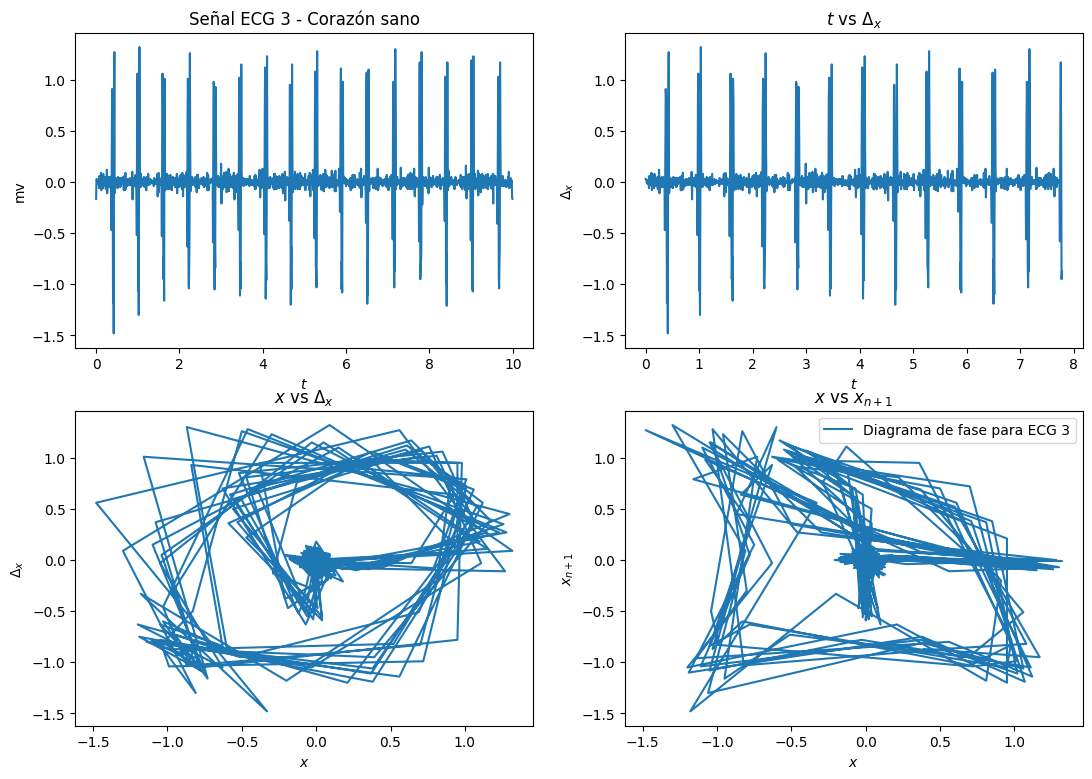

In [ ]:
ECG3 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 3 (corazón sano).csv'
        ,sep=';',low_memory=False)

# Con ECG 3 (Corazón sano).
t = np.array(ECG3.iloc [:, 0])
mv = np.array(ECG3.iloc [:, 1])
N = 1280

# t vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x_n vs x_(n+1)
mv_n1 = []
for n in range(1, N-1):
  mv_n1.append(mv[n+1])

fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(t,mv)
ax1.set_title('Señal ECG 3 - Corazón sano')
ax1.set(xlabel='$t$', ylabel='mv')

ax2.plot(t[:997],delta_mv[:997])
ax2.set_title('$t$ vs $\Delta_{x}$')
ax2.set(xlabel='$t$', ylabel='$\Delta_{x}$')

ax3.plot(mv[:997],delta_mv[:997])
ax3.set_title('$x$ vs $\Delta_{x}$')
ax3.set(xlabel='$x$', ylabel='$\Delta_{x}$')

ax4.plot(mv[:996],mv_n1[:996], label='Diagrama de fase para ECG 3')
ax4.set_title('$x$ vs $x_{n+1}$')
ax4.set(xlabel='$x$', ylabel='$x_{n+1}$')
plt.legend()

fig.set_size_inches(13,9)
plt.show()

**ECG 1.**

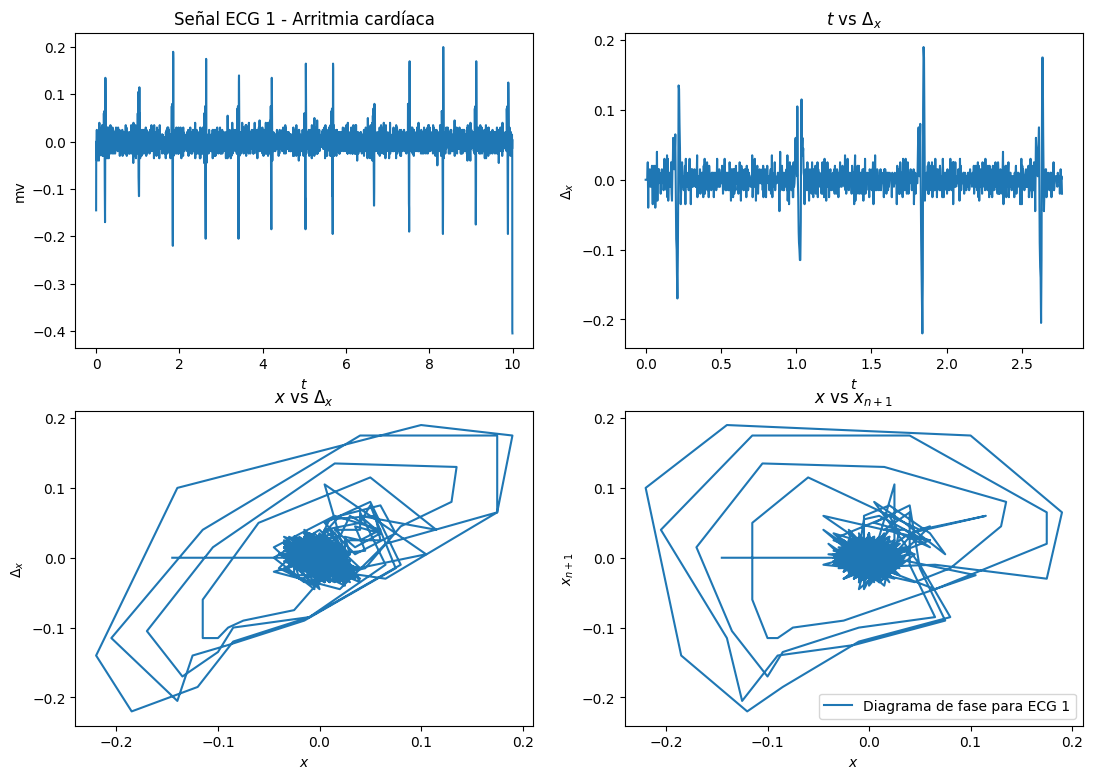

In [ ]:
ECG1 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 1 (arritmia cardiaca).csv',sep=';',low_memory=False)

# Con ECG 3 (Corazón sano).
t = np.array(ECG1.iloc [:, 0])
mv = np.array(ECG1.iloc [:, 1])
N = 3600

# t vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x_n vs x_(n+1)
mv_n1 = []
for n in range(1, N-1):
  mv_n1.append(mv[n+1])

fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(t,mv)
ax1.set_title('Señal ECG 1 - Arritmia cardíaca')
ax1.set(xlabel='$t$', ylabel='mv')

ax2.plot(t[:997],delta_mv[:997])
ax2.set_title('$t$ vs $\Delta_{x}$')
ax2.set(xlabel='$t$', ylabel='$\Delta_{x}$')

ax3.plot(mv[:997],delta_mv[:997])
ax3.set_title('$x$ vs $\Delta_{x}$')
ax3.set(xlabel='$x$', ylabel='$\Delta_{x}$')

ax4.plot(mv[:996],mv_n1[:996], label='Diagrama de fase para ECG 1')
ax4.set_title('$x$ vs $x_{n+1}$')
ax4.set(xlabel='$x$', ylabel='$x_{n+1}$')
plt.legend()

fig.set_size_inches(13,9)
plt.show()

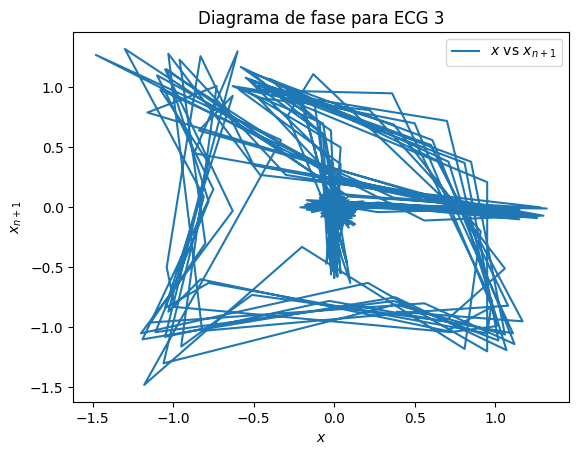

In [ ]:
ECG3 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 3 (corazón sano).csv'
        ,sep=';',low_memory=False)

# Con ECG 3 (Corazón sano).
t = np.array(ECG3.iloc [:, 0])
mv = np.array(ECG3.iloc [:, 1])
N = 1280

# t vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x_n vs x_(n+1)
mv_n1 = []
for n in range(1, N-1):
  mv_n1.append(mv[n+1])

plt.plot(mv[:996],mv_n1[:996], label='$x$ vs $x_{n+1}$')
plt.title('Diagrama de fase para ECG 3')
plt.xlabel('$x$')
plt.ylabel('$x_{n+1}$')
plt.legend()
plt.show()

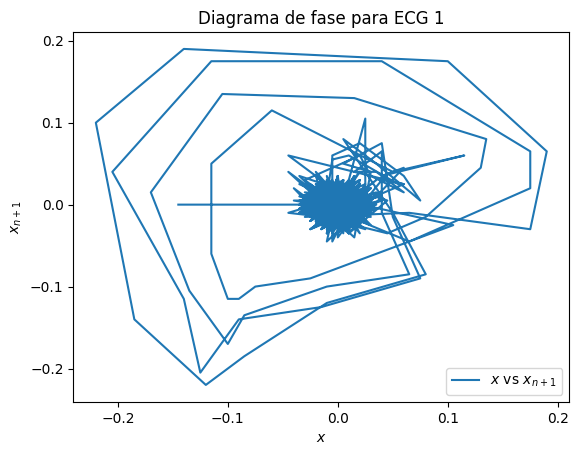

In [ ]:
ECG1 = pd.read_csv('/content/drive/MyDrive/Proyecto Mod II/ECG 1 (arritmia cardiaca).csv',sep=';',low_memory=False)

# Con ECG 3 (Corazón sano).
t = np.array(ECG1.iloc [:, 0])
mv = np.array(ECG1.iloc [:, 1])
N = 3600

# t vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x vs delta_x
delta_mv = []
for n in range(1, N-1):
  mv[n] = mv[n+1] - mv[n]
  delta_mv.append(mv[n])

# x_n vs x_(n+1)
mv_n1 = []
for n in range(1, N-1):
  mv_n1.append(mv[n+1])

plt.plot(mv[:996],mv_n1[:996], label='$x$ vs $x_{n+1}$')
plt.title('Diagrama de fase para ECG 1')
plt.xlabel('$x$')
plt.ylabel('$x_{n+1}$')
plt.legend()
plt.show()
